<a href="https://colab.research.google.com/github/Selviani20/UAE_Real_Estate_2024/blob/main/UAE_Real_Estate_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
df = pd.read_csv('uae_real_estate_2024.csv')

In [124]:
print(df.dtypes)

title             object
displayAddress    object
bathrooms         object
bedrooms          object
addedOn           object
type              object
price              int64
verified            bool
priceDuration     object
sizeMin           object
furnishing        object
description       object
dtype: object


In [125]:
print(df.isnull().sum())

title               0
displayAddress      0
bathrooms         120
bedrooms          123
addedOn             0
type                0
price               0
verified            0
priceDuration       0
sizeMin             0
furnishing          2
description         1
dtype: int64


In [126]:
# KOLOM "BATHROOMS"
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce')
mode_bathrooms = df['bathrooms'].mode()[0]
if pd.isna(mode_bathrooms):  # Jika mode adalah NaN
    mode_bathrooms = df['bathrooms'].dropna().mode()[0]  # Ambil mode tanpa NaN
df['bathrooms'].fillna(mode_bathrooms, inplace=True)

# KOLOM "BEDROOMS"
df['bedrooms'] = pd.to_numeric(df['bedrooms'], errors='coerce' )
print(df['bedrooms'].dtype)
print(df['bedrooms'].isnull ().sum())

df['bedrooms'].fillna(df['bedrooms'].mode()[0], inplace=True)


#KOLOM "FURNISHING"
mode_furnishing = df['furnishing'].mode()[0]
df['furnishing'].fillna(mode_furnishing, inplace=True)


#KOLOM "DESCRIPTION"
df['description'].fillna('No description provided', inplace=True)

float64
679


In [127]:
print(df.isnull().sum())

title             0
displayAddress    0
bathrooms         0
bedrooms          0
addedOn           0
type              0
price             0
verified          0
priceDuration     0
sizeMin           0
furnishing        0
description       0
dtype: int64


In [128]:
# MENGKONVERSI KOLOM KE NUMERIK
df['sizeMin'] = df['sizeMin'].str.replace('sqft', '', regex=False).astype(float)

In [129]:
print(df[['price', 'sizeMin', 'bedrooms', 'bathrooms']].describe())

              price        sizeMin     bedrooms    bathrooms
count  5.058000e+03    5058.000000  5058.000000  5058.000000
mean   5.050924e+06    2549.670621     2.394227     2.966983
std    1.000928e+07    3746.860842     1.453512     1.668105
min    1.000000e+05      82.000000     1.000000     1.000000
25%    1.200000e+06     802.000000     1.000000     2.000000
50%    2.350000e+06    1419.000000     2.000000     3.000000
75%    4.499375e+06    2799.750000     3.000000     4.000000
max    1.990000e+08  100000.000000     7.000000     7.000000


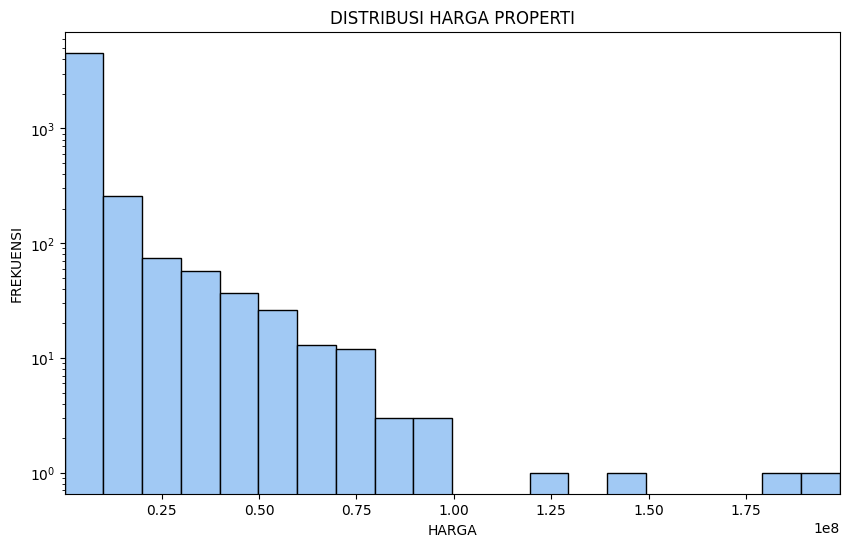

In [130]:
#VISUALISASI DISTRIBUSI HARGA
sns.set_palette('pastel')

plt.figure(figsize=(10,6))
plt.hist(df['price'],bins=20,color=sns.color_palette('pastel')[0],edgecolor='black',log='True')
plt.title('DISTRIBUSI HARGA PROPERTI')
plt.xlabel('HARGA')
plt.ylabel('FREKUENSI')
plt.xlim(df['price'].min(), df['price'].max())  # Menentukan batas sumbu x
plt.show()

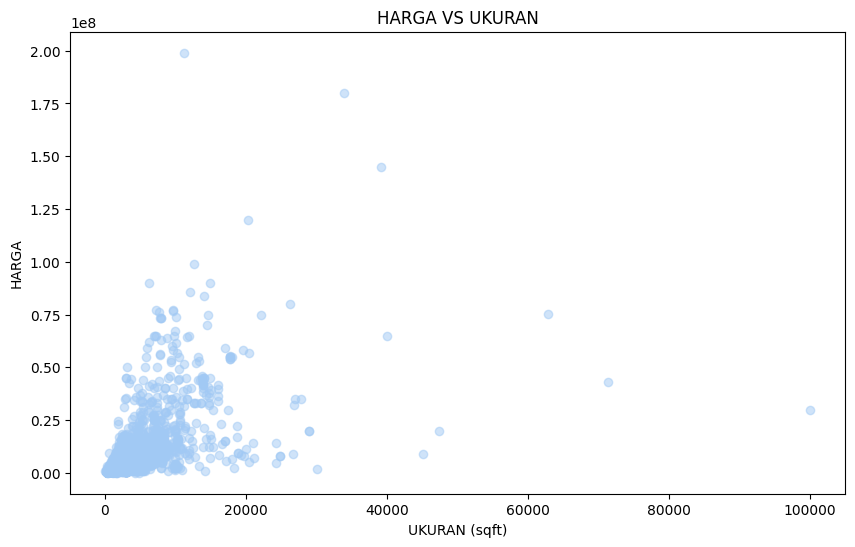

In [131]:
# KORELASI ANTARA HARGA DAN UKURAN
plt.figure(figsize=(10,6))
plt.scatter(df['sizeMin'],df['price'],alpha=0.5,)
plt.title('HARGA VS UKURAN')
plt.xlabel('UKURAN (sqft)')
plt.ylabel('HARGA')
plt.show()

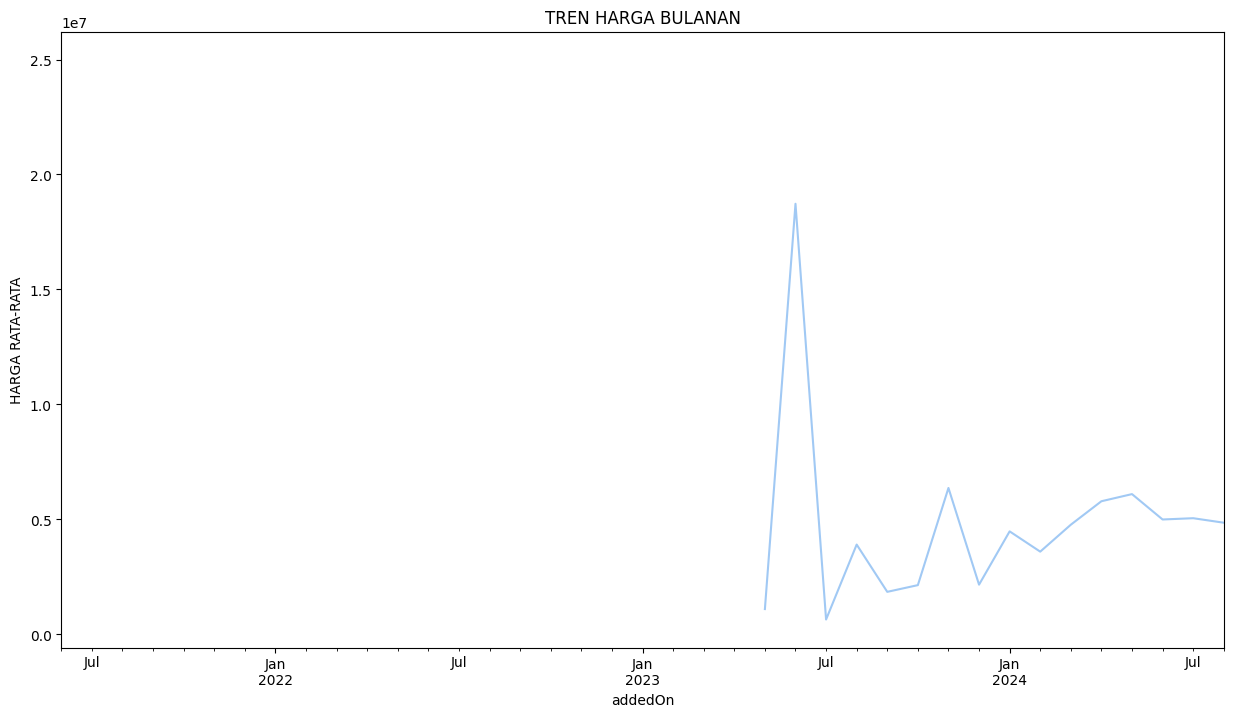

In [132]:
# ANALISIS TREN WAKTU
df['addedOn']=pd.to_datetime(df['addedOn'])
df.set_index('addedOn',inplace=True)
df['price'].resample('M').mean().plot(figsize=(15,8),title='TREN HARGA BULANAN')
plt.ylabel('HARGA RATA-RATA')
plt.show()